In [90]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout, Conv2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow import keras

In [91]:
base_model = tf.keras.applications.VGG19(input_shape=(150,150,3),
                                               include_top=False,
                                               weights='imagenet')

In [92]:
# model2 = tf.keras.applications.

In [93]:
base_model.trainable = False

In [94]:
def preProcessor(path):
    img = cv2.imread(path)
    print(img.shape)
    img = cv2.resize(img,(150,150))
    imgx = np.expand_dims(img, axis=0)

    print(imgx.shape)
    return imgx

In [95]:
def featureExtractor(imgPath):
    from keras.layers import Input, Flatten
    
    feature = base_model(preProcessor(imgPath))
    flattened = Flatten()(feature)
    print(flattened.shape)
    return flattened

In [96]:
# Training
benign = os.listdir("/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/Benign/")

c0 = []
for i in benign:
    c0.append([0,"/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/Benign/"+i])

insitu = os.listdir("/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/InSitu/")

c1 = []
for i in insitu:
    c1.append([1,"/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/InSitu/"+i])

invasive = os.listdir("/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/Invasive/")

c2 = []
for i in invasive:
    c2.append([2,"/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/Invasive/"+i])

normal = os.listdir("/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/Normal/")

c3 = []
for i in normal:
    c3.append([3,"/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/Normal/"+i])

datasetTrain  = c0 + c1 + c2 + c3
npDatasetTrain = np.array(datasetTrain)
# import numpy.random

np.random.seed(0)

np.random.shuffle(npDatasetTrain)

In [97]:
# Testing
benign = os.listdir("/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Testing/Benign/")

c0 = []
for i in benign:
    c0.append([0,"/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Testing/Benign/"+i])

insitu = os.listdir("/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Testing/InSitu/")

c1 = []
for i in insitu:
    c1.append([1,"/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Testing/InSitu/"+i])

invasive = os.listdir("/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Testing/Invasive/")

c2 = []
for i in invasive:
    c2.append([2,"/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Testing/Invasive/"+i])

normal = os.listdir("/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Testing/Normal/")

c3 = []
for i in normal:
    c3.append([3,"/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Testing/Normal/"+i])

datasetTest  = c0 + c1 + c2 + c3
npDatasetTest = np.array(datasetTest)
# import numpy.random

np.random.seed(0)

np.random.shuffle(npDatasetTest)

In [98]:
print(len(npDatasetTrain),len(npDatasetTest))

370 48


In [99]:
extractedFeatures = []
for i in npDatasetTrain:

    if i[1].split(".")[1]=="png":
        feature = featureExtractor(i[1])
        extractedFeatures.append([i[0],i[1],feature.numpy()])
    

(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048

In [100]:
extractedFeatures

[['1',
  '/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/InSitu/is038.png',
  array([[0.       , 0.       , 7.5180483, ..., 0.       , 0.       ,
          0.       ]], dtype=float32)],
 ['1',
  '/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/InSitu/is021.png',
  array([[0.        , 0.        , 0.        , ..., 0.        , 0.71537423,
          0.        ]], dtype=float32)],
 ['3',
  '/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/Normal/n016.png',
  array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)],
 ['0',
  '/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/Benign/b020.png',
  array([[ 0.      ,  0.      , 16.219095, ...,  0.      ,  0.      ,
           0.      ]], dtype=float32)],
 ['3',
  '/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Converted/Training/Normal/n088.png',
  array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)],
 ['1',
  '/Volumes/Windows/ICIAR2018_BACH_Challenge/Photos/Convert

In [101]:
L1 = []
L2 = []

for i in extractedFeatures:
    L1.append(i[2][0])
    L2.append(int(i[0]))

Xtrain = np.array(L1)
ytrain = np.array(L2)

print(Xtrain)

[[ 0.          0.          7.5180483  ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.71537423
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.         29.340237   ...  0.          0.
   0.        ]
 [ 0.          0.          0.21813822 ...  0.          0.
   0.        ]
 [ 0.          0.          5.865315   ...  0.          0.
   0.        ]]


In [102]:
ytrain

array([1, 1, 3, 0, 3, 1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 3,
       3, 3, 1, 2, 3, 1, 3, 0, 0, 1, 2, 2, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       1, 3, 2, 3, 0, 1, 0, 2, 3, 2, 1, 3, 0, 1, 0, 0, 0, 0, 0, 2, 3, 2,
       1, 0, 3, 2, 1, 3, 1, 2, 3, 0, 3, 2, 3, 2, 1, 0, 3, 2, 0, 2, 3, 2,
       2, 2, 1, 3, 0, 2, 2, 1, 2, 3, 0, 1, 0, 1, 3, 2, 3, 3, 0, 3, 1, 1,
       2, 3, 1, 2, 3, 3, 1, 1, 2, 3, 1, 1, 2, 0, 0, 1, 0, 2, 3, 1, 1, 2,
       2, 1, 0, 3, 0, 1, 0, 0, 2, 2, 3, 3, 2, 1, 1, 0, 3, 2, 0, 1, 3, 1,
       3, 0, 2, 2, 3, 3, 0, 2, 1, 1, 2, 1, 2, 1, 2, 3, 0, 2, 2, 2, 2, 0,
       2, 1, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 3, 3, 2, 1, 2, 1, 0, 1, 3,
       1, 3, 2, 3, 1, 1, 1, 1, 0, 3, 0, 1, 3, 2, 3, 1, 3, 0, 0, 0, 0, 0,
       2, 1, 3, 3, 2, 3, 0, 0, 1, 2, 3, 0, 2, 1, 0, 0, 0, 2, 1, 1, 3, 3,
       3, 0, 3, 3, 1, 3, 0, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 2, 3, 3, 3,
       1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 3, 0, 1, 2, 0, 3, 0, 3, 1, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 3, 3, 2, 2, 0, 1, 3, 3, 0,

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500)
clf.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=500)

In [89]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=Xtrain,label=ytrain)
xg_cls = xgb.XGBClassifier()

xg_cls.fit(Xtrain,ytrain)

/Users/anishpawar/miniforge3/envs/tfnew/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:35:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [105]:
# from sklearn import metrics

score=0

for i in range(len(Xtest)):

    pred = xg_cls.predict([Xtest[i]])

    if pred[0]==ytest[i]:
        score+=1
        print(pred[0],ytest[i])




0 0
2 2
3 3
2 2
0 0
0 0
0 0
2 2
2 2
2 2
1 1
1 1
2 2
1 1
0 0
2 2
0 0
1 1
1 1
0 0
2 2
0 0
1 1
3 3
1 1
0 0
3 3
0 0
0 0


In [106]:
print("Accuracy:{}".format(score/len(Xtest)))

Accuracy:0.6590909090909091


In [103]:
extractedFeaturesTest = []
for i in npDatasetTest:

    if i[1].split(".")[1]=="png":
        feature = featureExtractor(i[1])
        extractedFeaturesTest.append([i[0],i[1],feature.numpy()])
    

(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048, 3)
(1, 150, 150, 3)
(1, 8192)
(1536, 2048

In [104]:
L1 = []
L2 = []

for i in extractedFeaturesTest:
    L1.append(i[2][0])
    L2.append(int(i[0]))

Xtest = np.array(L1)
ytest = np.array(L2)

print(len(Xtest))

44


In [84]:
from sklearn import metrics

score=0

for i in range(len(Xtest)):

    pred = clf.predict([Xtest[i]])

    if pred[0]==ytest[i]:
        score+=1
        print(pred[0],ytest[i])




0 0
2 2
3 3
2 2
0 0
0 0
0 0
2 2
2 2
2 2
1 1
1 1
2 2
1 1
0 0
2 2
0 0
1 1
2 2
1 1
0 0
2 2
0 0
1 1
1 1
0 0
3 3
3 3
0 0
0 0


In [86]:
print("Accuracy:{}".format(score/len(Xtest)))

Accuracy:0.6818181818181818


In [140]:
import json


classes = []
paths = []
features = []

for i in extractedFeatures:
    classes.append(int(i[0]))
    paths.append(i[1])
    features.append(i[2].tolist())

dictionary ={
    "class" : classes,
    "path" : paths,
    "features" : features
}

json_object = json.dumps(dictionary)
  
with open("datasetFeatured.json", "w") as outfile:
    outfile.write(json_object)

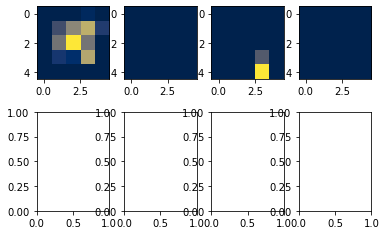

In [61]:
fig,ax = plt.subplots(2,4)

for i in range(0,4):
    fig1 = feature.numpy()[0,:,:,i]
    ax[0,i].imshow(fig1,cmap='cividis')
    # print(i%8,i%4)

In [ ]:
xlayers1 = base_model.layers
print(xlayers1)

(1536, 2048, 3)
(1, 150, 150, 3)


2022-01-22 17:18:44.132638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)
(1536, 2048, 3)
(1, 150, 150, 3)


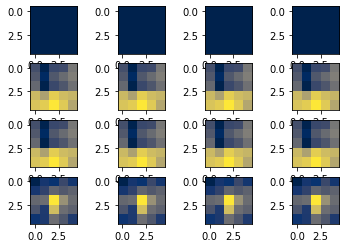

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

fig,ax = plt.subplots(4,4)
IMG_1 = 0
IMG_2 = 3
IMG_3 = 100
IMG_4 = 7

CONVOLUTION_NUMBER = 1
layer_outputs = [layer.output for layer in base_model.layers]

# print(len(layer_outputs))
# Creating Activation Model using inputs and Outputs of original model
activation_model = keras.models.Model(inputs=base_model.input,outputs=layer_outputs)

# Displaying Convolutions
# Because there are 2 Convolution layers and 2 Max Pooling layers
for x in range(0,4):
  fig_1 = activation_model.predict(preProcessor('/Volumes/MacOS/NRL_Microscopic/Breast_Cancer/ICIAR2018_BACH_Challenge/Photos/Converted/Benign/b001.png'))[-1]
  ax[0,x].imshow(fig_1[0,:,:,4],cmap='cividis')
  
  fig_2 = activation_model.predict(preProcessor('/Volumes/MacOS/NRL_Microscopic/Breast_Cancer/ICIAR2018_BACH_Challenge/Photos/Converted/Benign/b001.png'))[-2]
  ax[1,x].imshow(fig_2[0,:,:,4],cmap='cividis')
  
  fig_3 = activation_model.predict(preProcessor('/Volumes/MacOS/NRL_Microscopic/Breast_Cancer/ICIAR2018_BACH_Challenge/Photos/Converted/Benign/b001.png'))[-3]
  ax[2,x].imshow(fig_3[0,:,:,4],cmap='cividis')
  
  fig_4 = activation_model.predict(preProcessor('/Volumes/MacOS/NRL_Microscopic/Breast_Cancer/ICIAR2018_BACH_Challenge/Photos/Converted/Benign/b001.png'))[-4]
  ax[3,x].imshow(fig_4[0,:,:,4],cmap='cividis')

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

fig,ax = plt.subplots(4,4)
IMG_1 = 0
IMG_2 = 3
IMG_3 = 100
IMG_4 = 7

CONVOLUTION_NUMBER = 1
layer_outputs = [layer.output for layer in base_model.layers]

# Creating Activation Model using inputs and Outputs of original model
activation_model = keras.models.Model(inputs=base_model.input,outputs=layer_outputs)

# Displaying Convolutions
# Because there are 2 Convolution layers and 2 Max Pooling layers
for x in range(0,4):
  fig_1 = activation_model.predict(test_images[IMG_1].reshape(1,28,28,1))[x]
  ax[0,x].imshow(fig_1[0,:,:,CONVOLUTION_NUMBER],cmap='cividis')
  
  fig_2 = activation_model.predict(test_images[IMG_2].reshape(1,28,28,1))[x]
  ax[1,x].imshow(fig_2[0,:,:,CONVOLUTION_NUMBER],cmap='cividis')
  
  fig_3 = activation_model.predict(test_images[IMG_3].reshape(1,28,28,1))[x]
  ax[2,x].imshow(fig_3[0,:,:,CONVOLUTION_NUMBER],cmap='cividis')
  
  fig_4 = activation_model.predict(test_images[IMG_4].reshape(1,28,28,1))[x]
  ax[3,x].imshow(fig_4[0,:,:,CONVOLUTION_NUMBER],cmap='cividis')